In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import prophet

In [3]:
sales_train_df = pd.read_csv(r"C:\Users\pablo\Documents\Data_Science\ventas\train.csv", low_memory=False)

In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
store_info_df = pd.read_csv(r"C:\Users\pablo\Documents\Data_Science\ventas\store.csv", low_memory=False)

In [8]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### EDA

In [11]:
sales_train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store_info_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

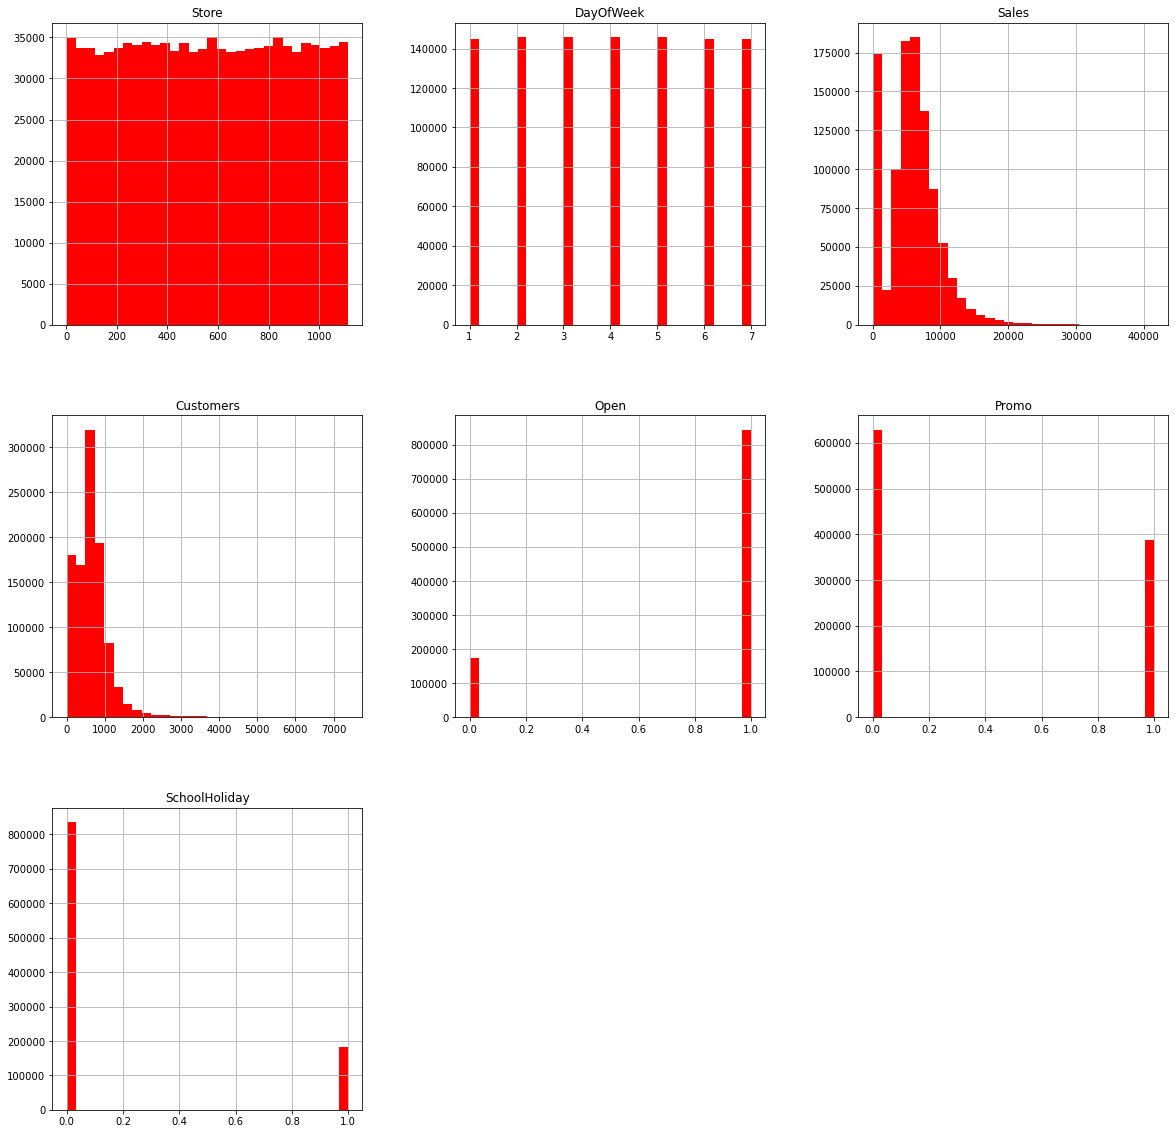

In [13]:
sales_train_df.hist(bins = 30, figsize=(20,20), color= "r")

In [14]:
sales_open= sales_train_df[sales_train_df["Open"]== 1]
sales_closed = sales_train_df[sales_train_df["Open"]== 0]

In [15]:
print("Porcentaje de tiendas cerradas = {}%".format(100.0*len(sales_closed)/len(sales_train_df)))

Porcentaje de tiendas cerradas = 16.98933060954042%


In [16]:
sales_train_df = sales_train_df[sales_train_df["Open"]==1]

In [17]:
sales_train_df.drop(columns="Open", axis=1, inplace=True)

In [18]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [19]:
store_info_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
replacing_cols = ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]

for col in replacing_cols:
    store_info_df[col].fillna(0, inplace=True)

In [22]:
store_info_df["CompetitionDistance"].fillna(store_info_df["CompetitionDistance"].mean(), inplace=True)

In [23]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

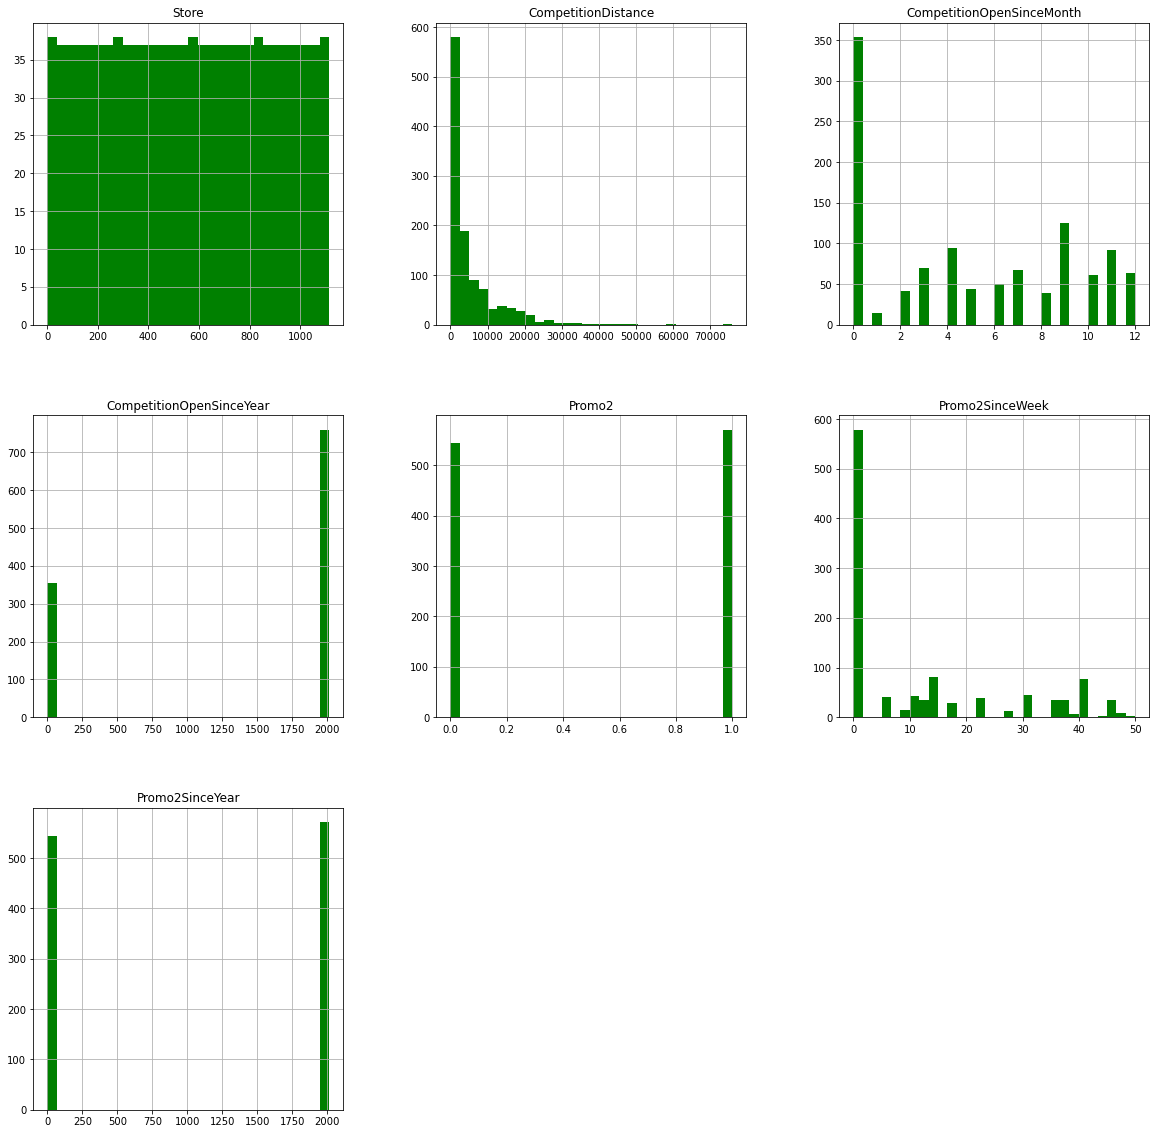

In [24]:
store_info_df.hist(bins= 30, figsize=(20,20), color = "g")

In [25]:
sales_store_df = pd.merge(sales_train_df, store_info_df, how = "inner", on= "Store")

In [26]:
sales_store_df.to_csv("sales_store.csv", index=False)

In [27]:
sales_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


<AxesSubplot:>

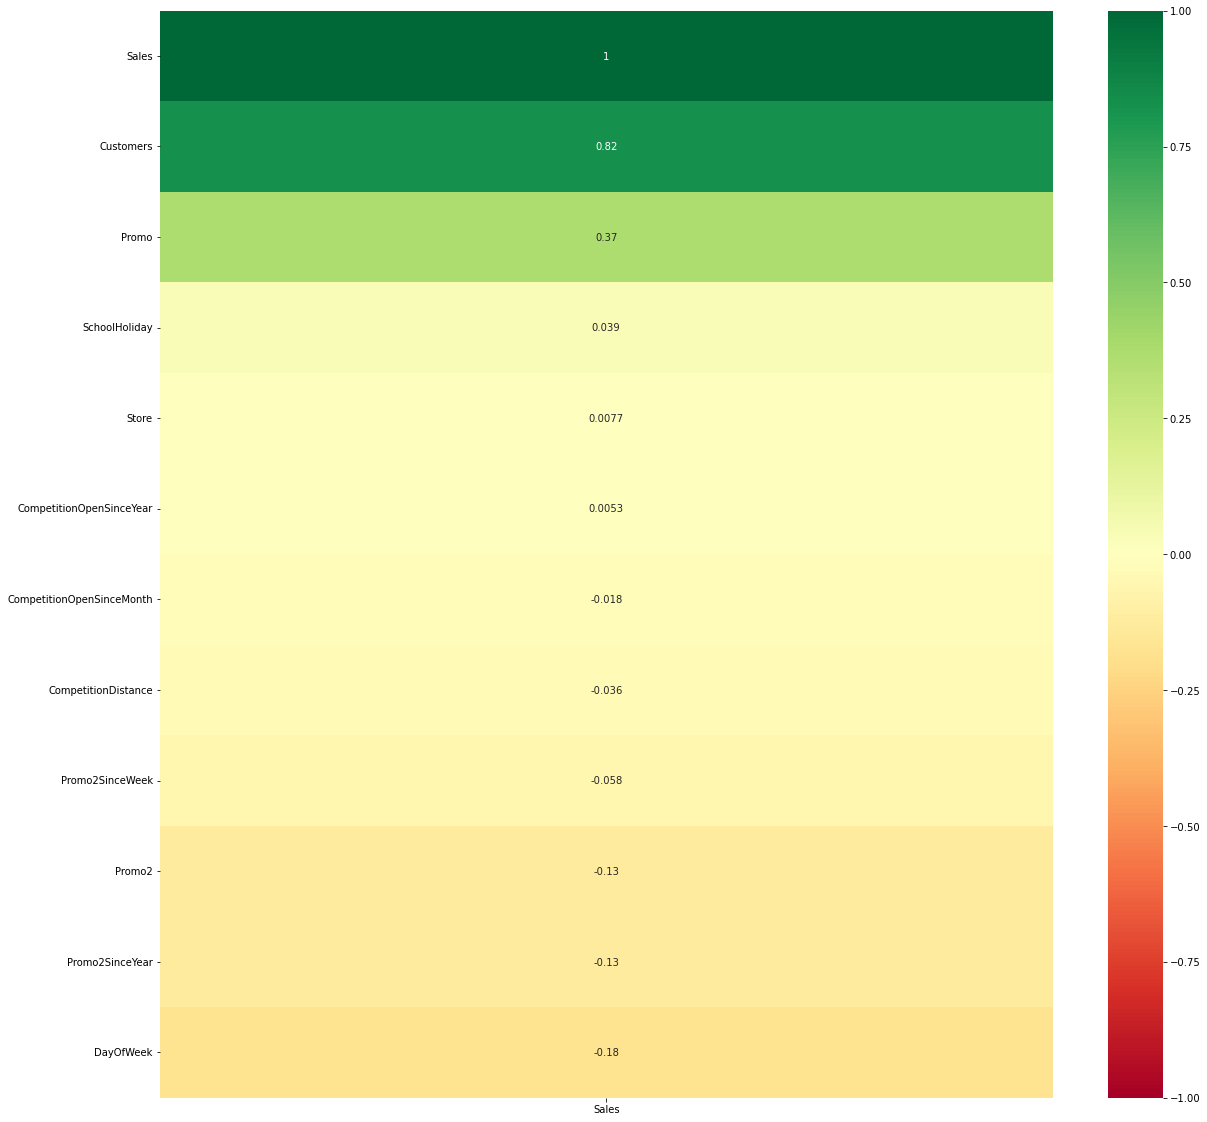

In [28]:
f, ax = plt.subplots(figsize= (20,20))
df_corr = sales_store_df.corr().loc[:, ['Sales']].sort_values('Sales', ascending=False)
sns.heatmap(df_corr, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

In [29]:
sales_store_df["Year"] = pd.DatetimeIndex(sales_train_df["Date"]).year
sales_store_df["Month"] = pd.DatetimeIndex(sales_train_df["Date"]).month
sales_store_df["Day"] = pd.DatetimeIndex(sales_train_df["Date"]).day

Text(0.5, 1.0, 'Clientes promedio al mes')

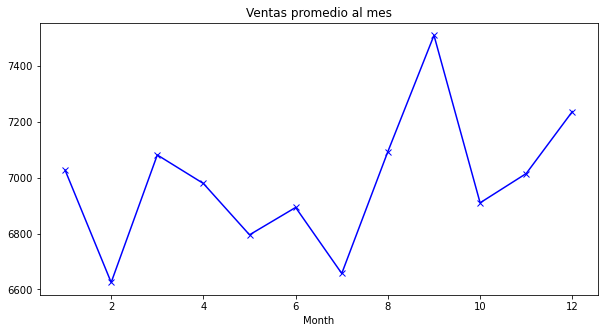

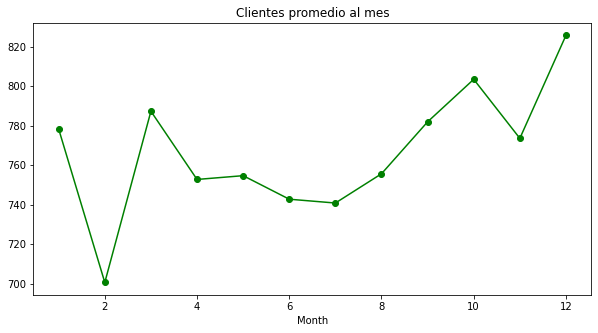

In [30]:
sales_month = sales_store_df.groupby("Month")["Sales"].mean().plot(figsize = (10, 5), marker="x", color="b")
sales_month.set_title("Ventas promedio al mes")

plt.figure()
sales_month = sales_store_df.groupby("Month")["Customers"].mean().plot(figsize = (10, 5), marker="o", color="g")
sales_month.set_title("Clientes promedio al mes")

Text(0.5, 1.0, 'Clientes promedio al día')

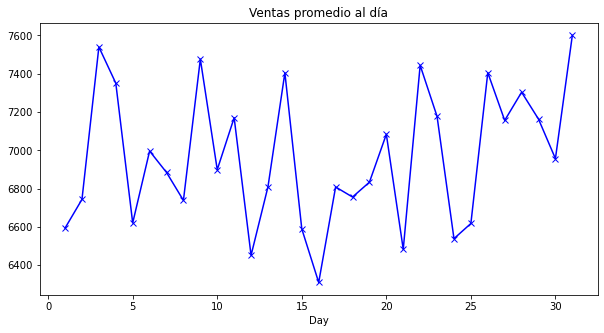

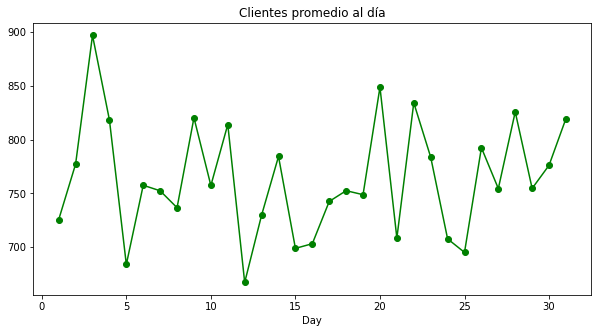

In [31]:
sales_day = sales_store_df.groupby("Day")["Sales"].mean().plot(figsize = (10, 5), marker="x", color="b")
sales_day.set_title("Ventas promedio al día")

plt.figure()
sales_day = sales_store_df.groupby("Day")["Customers"].mean().plot(figsize = (10, 5), marker="o", color="g")
sales_day.set_title("Clientes promedio al día")

Text(0.5, 1.0, 'Clientes promedio al día')

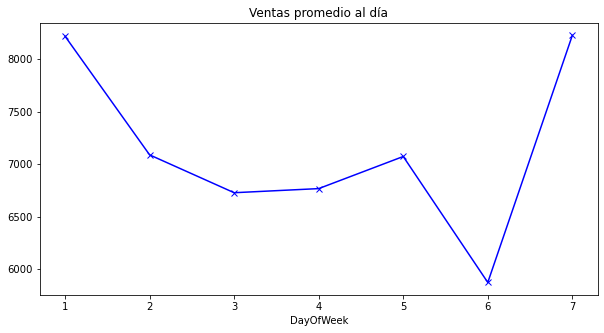

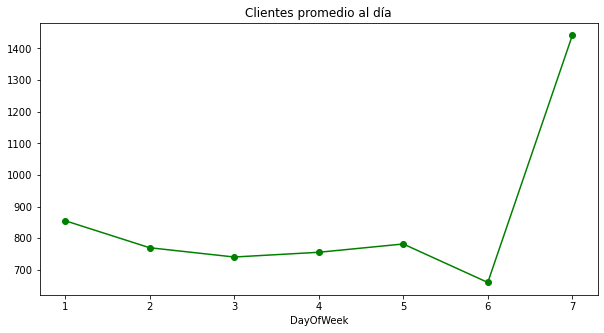

In [32]:
sales_day_week = sales_store_df.groupby("DayOfWeek")["Sales"].mean().plot(figsize = (10, 5), marker="x", color="b")
sales_day_week.set_title("Ventas promedio al día")

plt.figure()
sales_day_week = sales_store_df.groupby("DayOfWeek")["Customers"].mean().plot(figsize = (10, 5), marker="o", color="g")
sales_day_week.set_title("Clientes promedio al día")

In [36]:
sales_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31


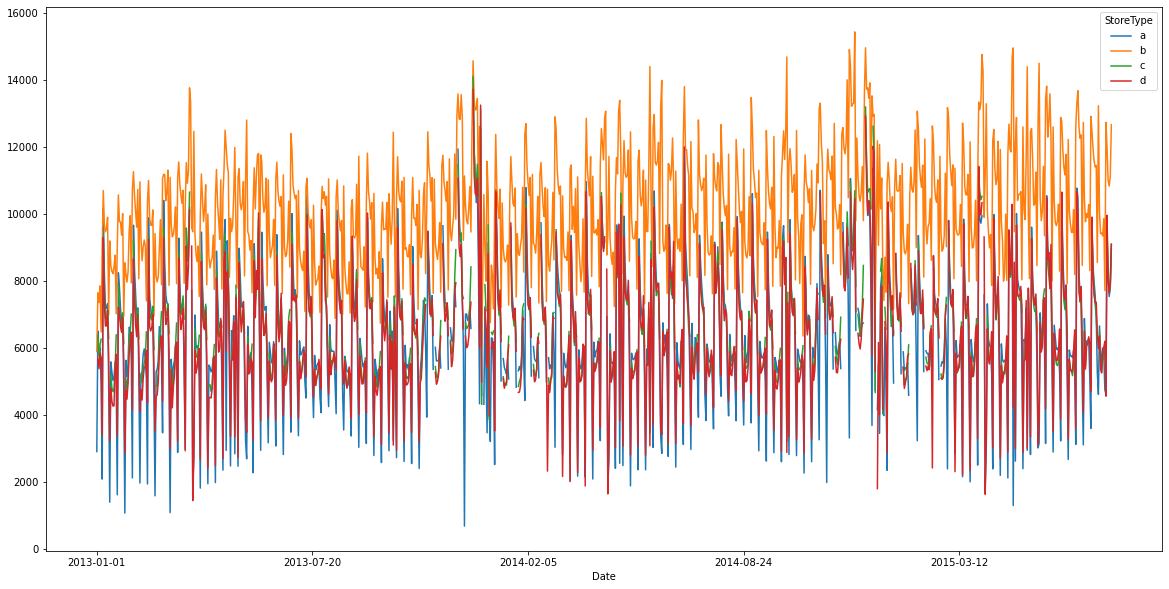

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sales_stores = sales_store_df.groupby(["Date", "StoreType"]).mean()["Sales"].unstack().plot(ax=ax)

In [54]:
def sales_predictions(Store_ID, data_frame, periods):
    data_frame = data_frame[data_frame["Store"] == Store_ID]
    data_frame = data_frame[["Date", "Sales"]].rename(columns= {"Date": "ds", "Sales":"y"})
    data_frame = data_frame.sort_values("ds")
    
    
    m = prophet.Prophet(interval_width = 0.95, daily_seasonality=True)
    m.fit(data_frame)
    future = m.make_future_dataframe(periods = periods)
    forecast = m.predict(future)
    fig = m.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    fig2 = m.plot_components(forecast)
    
    

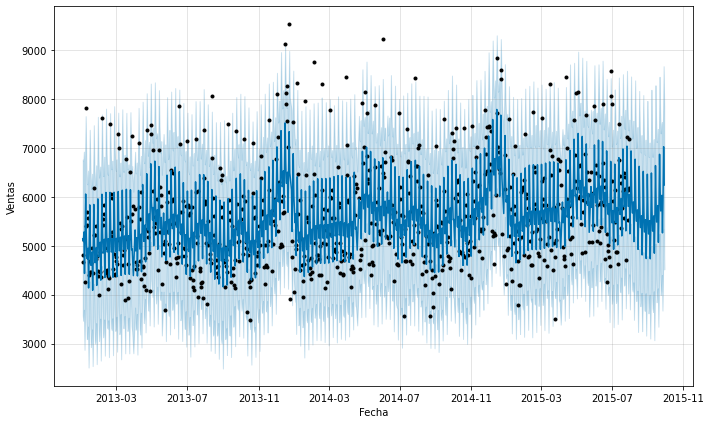

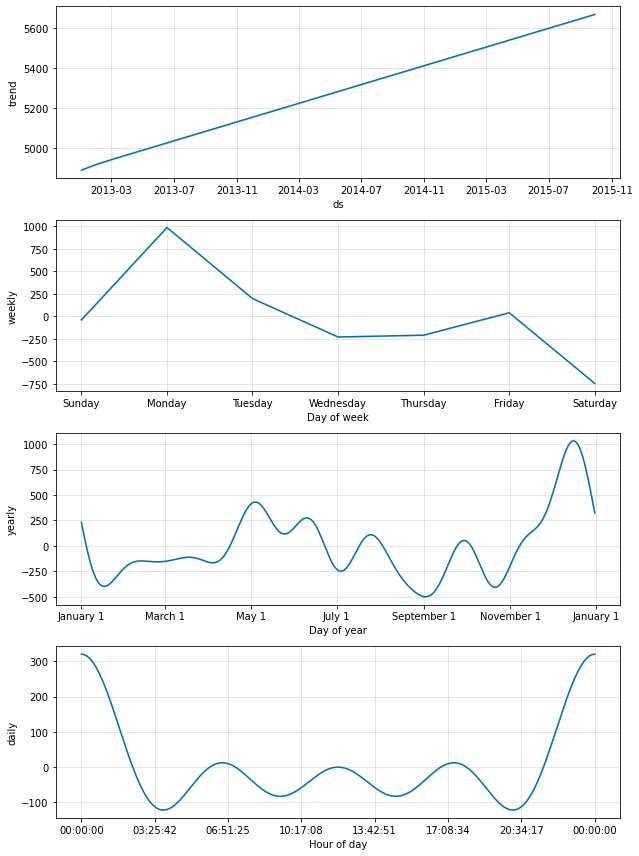

In [55]:
sales_predictions(10, sales_store_df, 60)

In [56]:
def sales_predictions(Store_ID, data_frame, periods, holidays):
    data_frame = data_frame[data_frame["Store"] == Store_ID]
    data_frame = data_frame[["Date", "Sales"]].rename(columns= {"Date": "ds", "Sales":"y"})
    data_frame = data_frame.sort_values("ds")
    
    
    m = prophet.Prophet(interval_width = 0.95, daily_seasonality=True, holidays=holidays)
    m.fit(data_frame)
    future = m.make_future_dataframe(periods = periods)
    forecast = m.predict(future)
    fig = m.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    fig2 = m.plot_components(forecast)
    
    

In [68]:
school_holidays = sales_store_df[sales_store_df["SchoolHoliday"] == 1].loc[:, "Date"].values
school_holidays = np.unique(school_holidays)
school_holidays = pd.DataFrame({"ds":pd.to_datetime(school_holidays), "holiday": "school_holiday"})
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [69]:
state_holidays = sales_store_df[(sales_store_df["StateHoliday"] == "a")|
                                (sales_store_df["StateHoliday"] == "b")|
                                (sales_store_df["StateHoliday"] == "c")].loc[:, "Date"].values
state_holidays = np.unique(state_holidays)
state_holidays = pd.DataFrame({"ds":pd.to_datetime(state_holidays), "holiday": "state_holiday"})
state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
5,2013-05-09,state_holiday
6,2013-05-20,state_holiday
7,2013-05-30,state_holiday
8,2013-08-15,state_holiday
9,2013-10-03,state_holiday


In [71]:
holidays_df = pd.concat((school_holidays, state_holidays), axis=0)

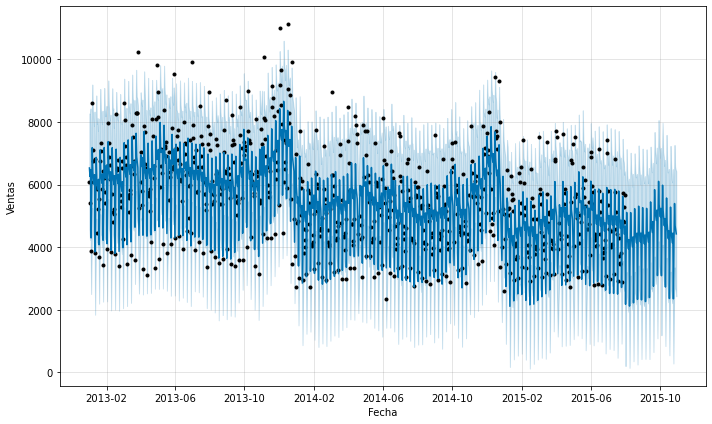

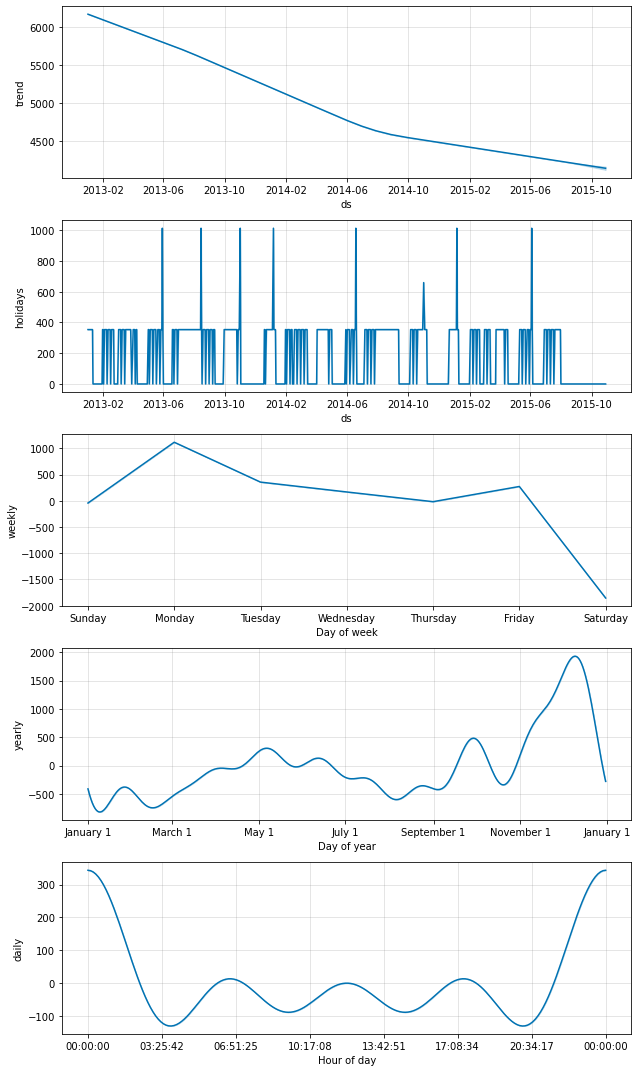

In [72]:
sales_predictions (6, sales_store_df, 90, holidays_df)